# keras 

In [20]:
import keras
keras.__version__
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
## mnist데이터 훈련 세트구성 

In [22]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
train_images = train_images.reshape((train_images.shape[0], img_rows, img_cols, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((test_images.shape[0],img_rows, img_cols, 1))
test_images = test_images.astype('float32') / 255

num_classes = 10
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels,num_classes)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
## keras 신경망 구성요소 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 batch_size=128,
                 epochs=12,
                 verbose=1, 
                 validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 49s 815us/step - loss: 0.1893 - accuracy: 0.9417 - val_loss: 0.0430 - val_accuracy: 0.9851
Epoch 2/12
60000/60000 [==============================] - 49s 812us/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0370 - val_accuracy: 0.9870
Epoch 3/12
60000/60000 [==============================] - 50s 838us/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0269 - val_accuracy: 0.9919
Epoch 4/12
60000/60000 [==============================] - 45s 746us/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0238 - val_accuracy: 0.9921
Epoch 5/12
60000/60000 [==============================] - 45s 745us/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0237 - val_accuracy: 0.9916
Epoch 6/12
60000/60000 [==============================] - 47s 779us/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0243 - val_accuracy: 0.9926
Epoch 7/12
60000/60000 [==============================]

In [27]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02333624084459684
Test accuracy: 0.9926999807357788


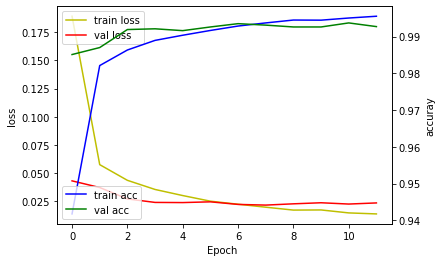

In [31]:

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch ')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()